In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson ,boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import shapiro, kstest, normaltest,skew
import statsmodels.api as sm
import pickle
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings

warnings.filterwarnings('ignore')


### 1. Problem Statement


In [ ]:
Hours of study = No of hours the student is studing
Previous Scores =The last exam how much he scoraed
Extracurricular Activities = the exctra activities done by he or not
Sleep Hours= how many hours he sleep on daily besis
Sample Question Papers Practiced= how many Sample Question Papers Practiced 
Performance Index=how many score he scored in exam

### 2. Data Gathering


In [3]:
# read data set
df=pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# check data shape
df.shape

(10000, 6)

In [5]:
# check data report
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### 3. Exploratory Data Analysis¶

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df['Extracurricular Activities']= df['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [9]:

# columns_to_transform = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

# for column in columns_to_transform:
#     # Apply Box-Cox transformation
#     transformed_data, lambda_value = yeojohnson(df[column])
    
#     # Replace the original column with the transformed data
#     df[column] = transformed_data

# # Display the first few rows of the DataFrame with transformed columns
# print(df.head())


In [10]:
# # Define columns to normalize or standardize
# columns_to_normalize = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
# columns_to_standardize = ['Performance Index']

# # # Normalization
# # scaler = MinMaxScaler()  # Create a MinMaxScaler object
# # df_normalized = df.copy()  # Create a copy of the DataFrame
# # df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# # Standardization
# scaler = StandardScaler()  # Create a StandardScaler object
# df_standardized = df.copy()  # Create a copy of the DataFrame
# df_standardized[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# # # Display the first few rows of the normalized and standardized DataFrames
# # print("Normalized DataFrame:")
# # print(df_normalized.head())

# print("\nStandardized DataFrame:")
# print(df_standardized.head())


<Axes: xlabel='Hours Studied', ylabel='Density'>

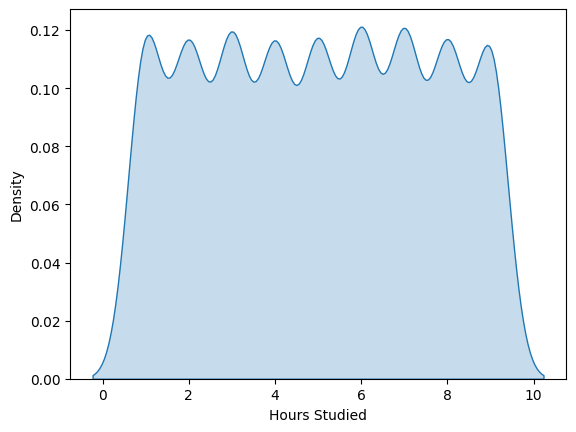

In [11]:
sns.kdeplot(df['Hours Studied'], fill = True)

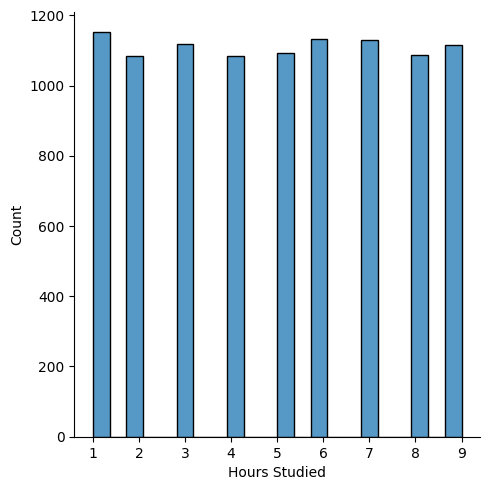

In [12]:
sns.displot (df['Hours Studied'])

here no outliers are present


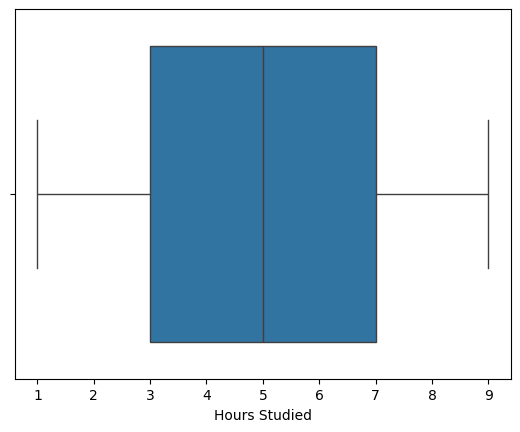

In [13]:
# we need to check the outliers of given data
sns.boxplot(x=df['Hours Studied'])
print('here no outliers are present')

<Axes: xlabel='Previous Scores'>

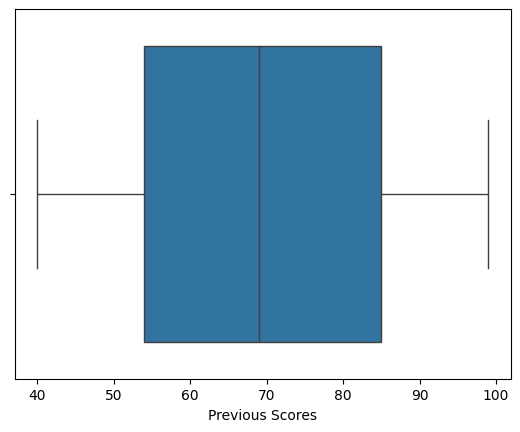

In [14]:
sns.boxplot(x=df['Previous Scores'])

<Axes: xlabel='Sleep Hours'>

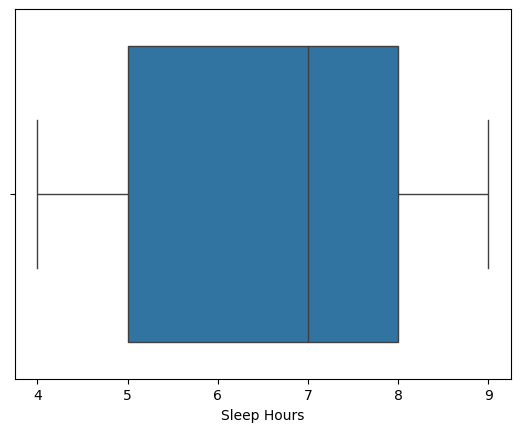

In [15]:
sns.boxplot(x=df['Sleep Hours'])

<Axes: xlabel='Sample Question Papers Practiced'>

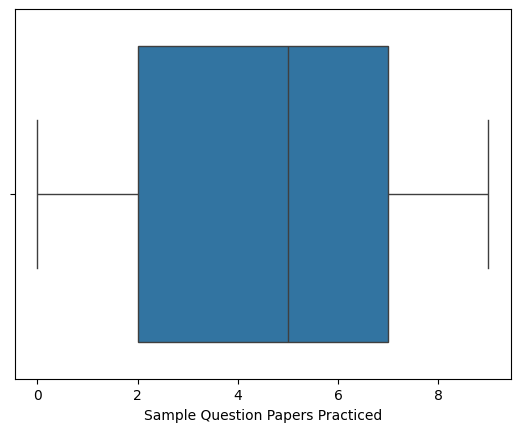

In [16]:
sns.boxplot(x=df['Sample Question Papers Practiced'])

<Axes: xlabel='Performance Index'>

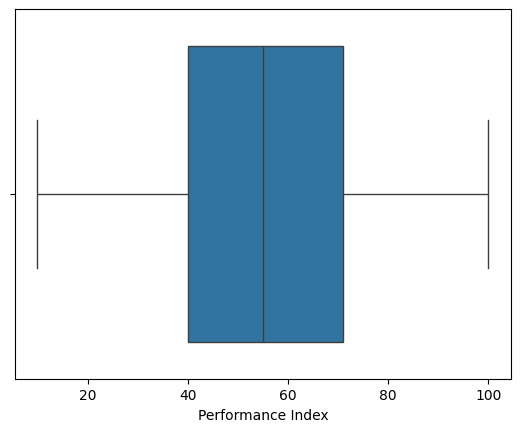

In [17]:
sns.boxplot(x=df['Performance Index'])

In [18]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

### Linearity

In [19]:
# we need to check independent vs dependent variables

In [20]:
df.corr().tail(1)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Performance Index,0.37373,0.915189,0.024525,0.048106,0.043268,1.0


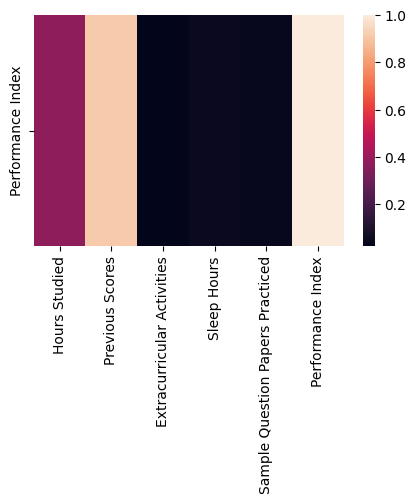

In [21]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr().tail(1))
plt.savefig('linearity_check')

### No Multicolinearity

In [22]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [23]:
x=df.drop(['Performance Index'],axis=1)
y=df['Performance Index']

In [24]:
x.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [25]:
vif_list=[]
for idx in range(x.shape[1]):
    vif = variance_inflation_factor(x,idx)
    print("VIF :",vif)

VIF : 4.2632437214260035
VIF : 10.088585828679022
VIF : 1.9282350416149356
VIF : 9.833594114701873
VIF : 3.350480920385403


<Axes: >

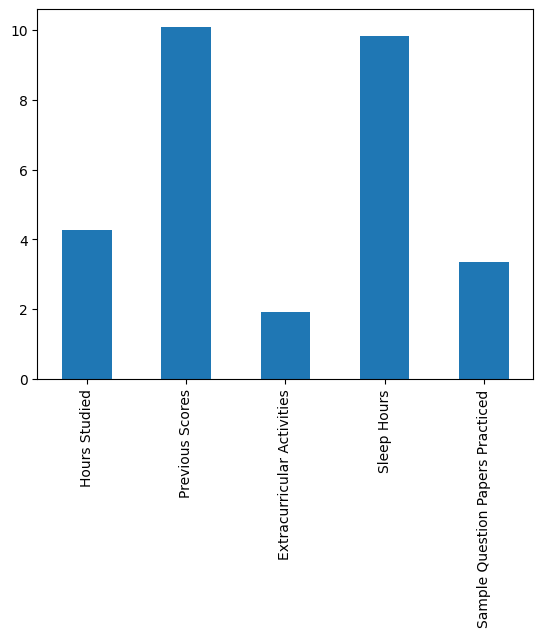

In [26]:
vif_list=[]
for idx in range(x.shape[1]):
    vif = variance_inflation_factor(x,idx)
    # print("VIF :",vif)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index = x.columns)
s1.plot(kind = 'bar')

### Train test split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 23)

In [28]:
x_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6326,8,92,1,9,2
5185,9,65,1,4,7
2495,3,89,1,5,8
2765,6,48,1,5,6
9303,2,61,1,5,1
...,...,...,...,...,...
5640,3,69,0,6,2
8667,1,69,1,8,6
6027,5,61,1,7,3
8662,9,55,1,5,4


In [29]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [30]:
lin_reg.coef_

array([2.84965146, 1.01876339, 0.60085653, 0.47400823, 0.18781261])

In [31]:
lin_reg.intercept_

-33.999955182656386

In [32]:
y_pred = lin_reg.predict(x_test)
y_pred.shape

(2000,)

In [33]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

r_squared = r2_score(y_test, y_pred)
print("R-Squared :",r_squared)

MSE : 4.1149124100865855
R-Squared : 0.988869522944553


In [34]:
lin_reg.score(x_test, y_test)

0.988869522944553

In [35]:
lin_reg.score(x_train, y_train)

0.9887207798576839

### Training Data Evaluation

In [36]:
y_pred_train = lin_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 4.161208898614592
RMSE: 2.0399041395650412
MAE : 1.6230847587429111
R-Squared : 0.9887207798576839


### Residual

In [37]:
residual = y_train - y_pred_train

### Testing Data Evaluation

In [38]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r_squared = r2_score(y_test, y_pred)
print("R-Squared :",r_squared)

MSE : 4.1149124100865855
RMSE: 2.0285246880643544
MAE : 1.5957425580938407
R-Squared : 0.988869522944553


### Normality

<Axes: xlabel='Performance Index', ylabel='Density'>

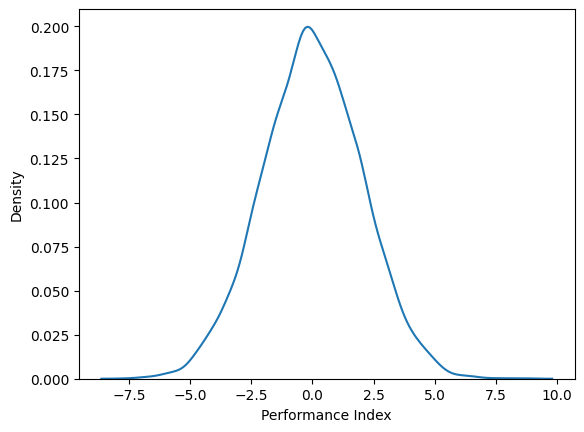

In [39]:
sns.kdeplot(residual)

<Axes: xlabel='Hours Studied', ylabel='Density'>

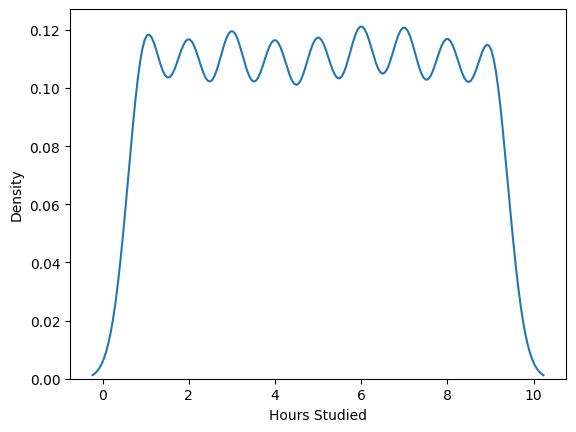

In [40]:
sns.kdeplot(df['Hours Studied'])

<Axes: xlabel='Previous Scores', ylabel='Density'>

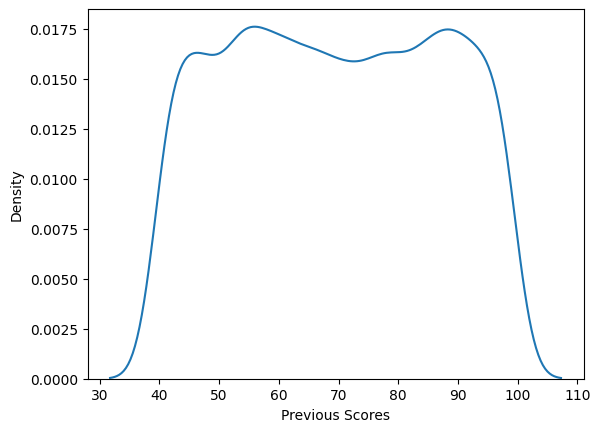

In [41]:
sns.kdeplot(df['Previous Scores'])

<Axes: xlabel='Extracurricular Activities', ylabel='Density'>

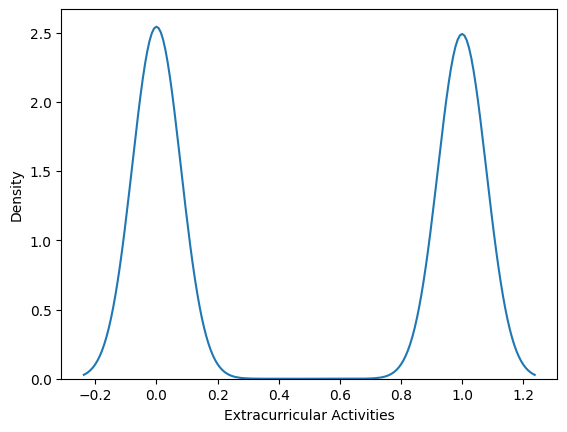

In [42]:
sns.kdeplot(df['Extracurricular Activities'])

<Axes: xlabel='Sleep Hours', ylabel='Density'>

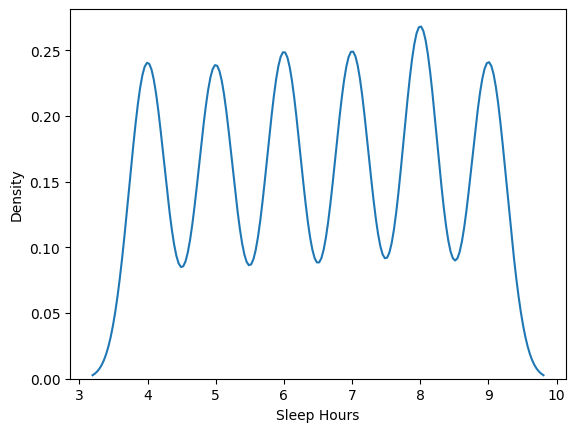

In [43]:
sns.kdeplot(df['Sleep Hours'])

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Density'>

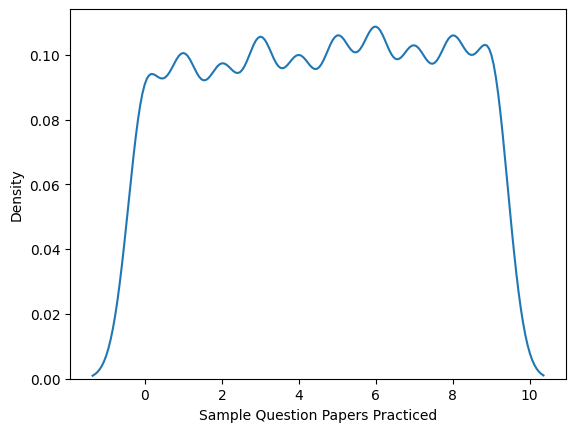

In [44]:
sns.kdeplot(df['Sample Question Papers Practiced'])

<Axes: xlabel='Performance Index', ylabel='Density'>

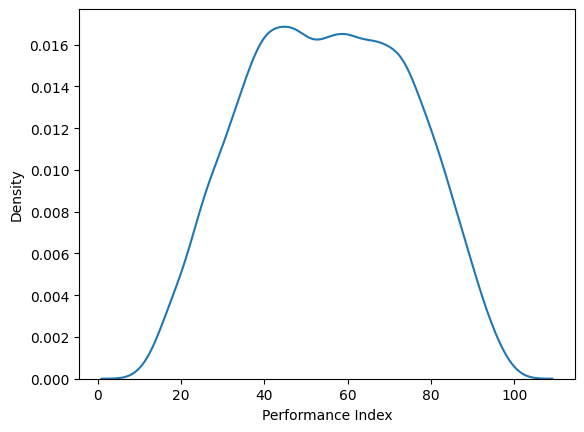

In [45]:
sns.kdeplot(df['Performance Index'])

In [46]:
df.head(1)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0


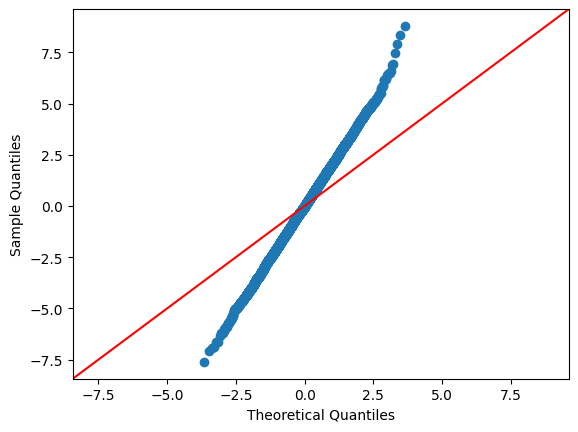

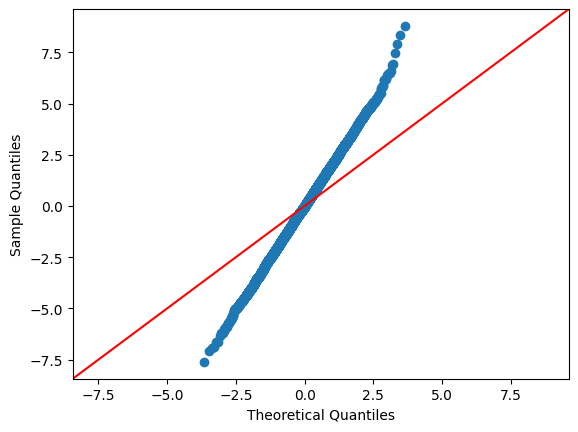

In [47]:
sm.qqplot(residual,line='45')

### 3.1 shapiro test

In [48]:
from scipy.stats import shapiro

In [49]:
stat, p_val = shapiro(residual)
print('P Value :', p_val)
if p_val >= 0.05:
    print("Data is normally Distributed")

else:
    print("Data is not normally Distributed")

P Value : 0.6801812052726746
Data is normally Distributed


### 3.2 kstest

In [50]:
from scipy.stats import kstest

In [51]:
_, p_val = kstest(residual, 'norm')
print('P Value :', p_val)
if p_val >= 0.05:
    print("Data is normally Distributed")

else:
    print("Data is not normally Distributed")

P Value : 8.549041300200746e-197
Data is not normally Distributed


In [52]:
_, p_val = kstest(residual, 'norm')
print('P Value :', p_val)
if p_val >= 0.05:
    print("Data is normally Distributed")
    print("NULL Hypothesis is True")

else:
    print("Data is not normally Distributed")
    print("Alternate Hypotheis is True")

P Value : 8.549041300200746e-197
Data is not normally Distributed
Alternate Hypotheis is True


### 3.3 Normal Test

In [53]:
_, p_val = normaltest(residual)
print('P Value :', p_val)
if p_val >= 0.05:
    print("Data is normally Distributed")
    print("NULL Hypothesis is True")

else:
    print("Data is not normally Distributed")
    print("Alternate Hypotheis is True")

P Value : 0.6019723394104284
Data is normally Distributed
NULL Hypothesis is True


### Homoscedasticity

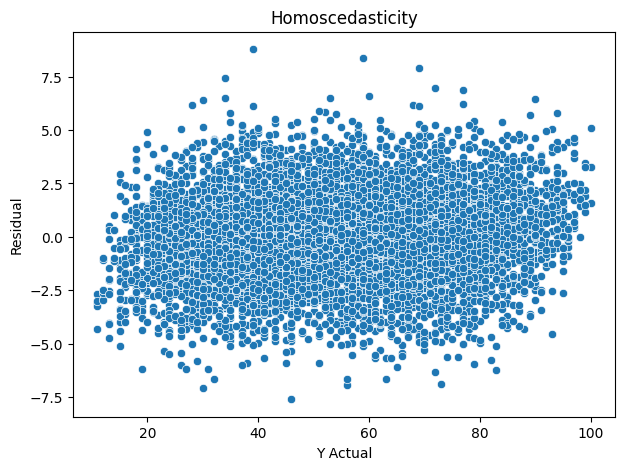

In [54]:
plt.figure(figsize=(7,5))
sns.scatterplot(x = y_train, y = residual)
plt.xlabel("Y Actual")
plt.ylabel("Residual")
plt.title("Homoscedasticity")
plt.savefig('Homoscedasticity.png')

### Regularization

Hours Studied                       2.849651
Previous Scores                     1.018763
Extracurricular Activities          0.600857
Sleep Hours                         0.474008
Sample Question Papers Practiced    0.187813
dtype: float64

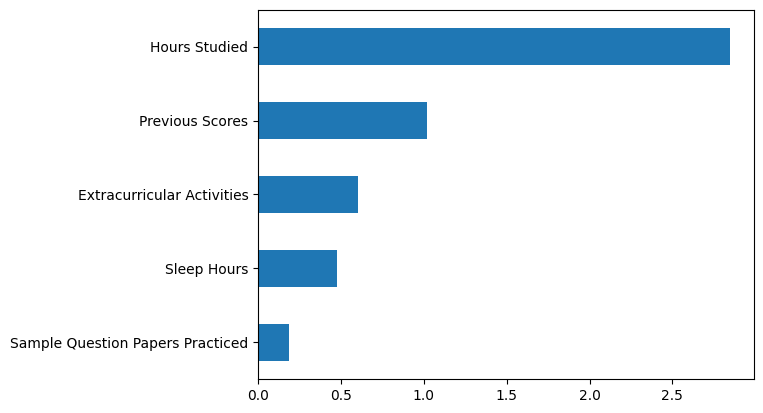

In [55]:
s1 = pd.Series(lin_reg.coef_, index= x.columns)
s1.sort_values().plot(kind = 'barh')
s1

### 1. Ridge Regression

Hours Studied                       2.849599
Previous Scores                     1.018763
Extracurricular Activities          0.600555
Sleep Hours                         0.473985
Sample Question Papers Practiced    0.187812
dtype: float64

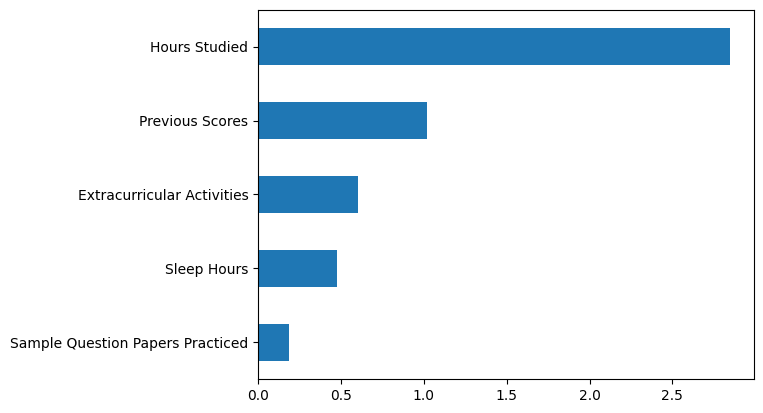

In [56]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(x_train, y_train)
s1 = pd.Series(ridge_reg.coef_, index= x.columns)
s1.sort_values().plot(kind = 'barh')
s1

### Training Data Evaluation

In [57]:
y_pred_train = ridge_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 4.161208941527626
RMSE: 2.0399041500834363
MAE : 1.623086171049938
R-Squared : 0.9887207797413654


### Testing Data Evaluation

In [58]:
y_pred = ridge_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r_squared = r2_score(y_test, y_pred)
print("R-Squared :",r_squared)

MSE : 4.114938243454921
RMSE: 2.0285310555805944
MAE : 1.5957468092329723
R-Squared : 0.988869453067558


### Hyperparameter Tuning¶

In [59]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

criterion='gini',
max_depth=5,
min_samples_split=2,
min_samples_leaf=1,

hyp_grid = {"criterion" : ['gini', 'entropy'],
            "max_depth" : np.arange(5,10),
            "min_samples_split" : np.arange(2,10),
            "min_samples_leaf" : [1,5,6,7,8,9],
            }

In [60]:
ridge_reg = Ridge()
hyp_grid = {"alpha" : np.arange(0.01,3, 0.01)}
gscv_ridge_reg = GridSearchCV(estimator=ridge_reg, param_grid = hyp_grid, cv=4)
gscv_ridge_reg.fit(x_train, y_train)
gscv_ridge_reg.best_estimator_

Ridge(alpha=2.6799999999999997)

Hours Studied                       2.849648
Previous Scores                     1.018763
Extracurricular Activities          0.600838
Sleep Hours                         0.474007
Sample Question Papers Practiced    0.187813
dtype: float64

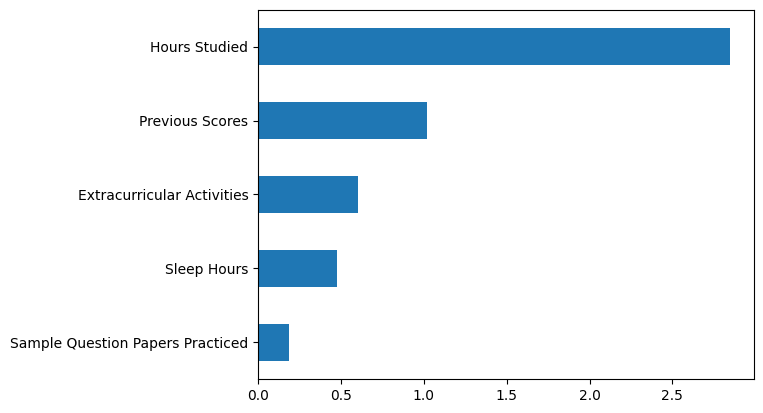

In [61]:
ridge_reg = Ridge(alpha=0.06)
ridge_reg.fit(x_train, y_train)
s1 = pd.Series(ridge_reg.coef_, index= x.columns)
s1.sort_values().plot(kind = 'barh')
s1

In [62]:
y_pred_train = ridge_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 4.16120889876916
RMSE: 2.0399041396029274
MAE : 1.6230848434949585
R-Squared : 0.9887207798572649


In [63]:
x_test.head(1).to_numpy()

array([[ 8, 92,  1,  9,  2]], dtype=int64)

In [64]:
y_pred_new = lin_reg.predict(x_test.head(1))
y_pred_new

array([87.76604373])

In [65]:
lin_reg.feature_names_in_

array(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'], dtype=object)

In [66]:
lin_reg.n_features_in_

5

In [67]:
# Define the features for the test array
hours_studied = 9
previous_scores = 99

extracurricular_activities = 1  # Assuming 1 for 'yes' and 0 for 'no'
sleep_hours = 6
sample_question_papers_practiced = 2

# Create the test array
test_array = np.zeros((1, lin_reg.n_features_in_))
test_array[0, 0] = hours_studied
test_array[0, 1] = previous_scores
test_array[0, 2] = extracurricular_activities
test_array[0, 3] = sleep_hours
test_array[0, 4] = sample_question_papers_practiced

print("Test array:")
print(test_array)

# Make predictions using the linear regression model
prediction = lin_reg.predict(test_array)[0]
print("Predicted Performance Index:", prediction)


Test array:
[[ 9. 99.  1.  6.  2.]]
Predicted Performance Index: 96.325014188218


In [68]:
with open("linear_reg_model.pkl", 'wb') as f:
    pickle.dump(lin_reg, f)

In [70]:

x.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')